In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
list_capteurs = ['C45BBE384CD2', 'C45BBE386362', 'C45BBE386952', 'C45BBE39870E', 'C45BBE39F42A', 'C45BBE39F56A', 'C45BBE39F9AE', 'AB032A311FAA', 'A8032A31204E', 'C45BBE37B346']
list_capteurs_dist = {'C45BBE384CD2' : 0, 'C45BBE386362' : 80, 'C45BBE386952' : 65, 'C45BBE39870E' : 0, 'C45BBE39F42A' : 0, 'C45BBE39F56A' : 56, 'C45BBE39F9AE' : 13, 'AB032A311FAA' : 4, 'A8032A31204E' : 29, 'C45BBE37B346' : 52}

In [3]:
'''
Dans cette fonction on prend en entrée une limite de rssi et la liste des capteurs avec 
leur position dans le couloir.
On calcule pour chaque metre la moyenne des positions des capteurs qui captent entre le maximum
de rssi enregistré et le max moins la limite.
On retourne ensuite une liste de chacune de ces positions pour chaque metre
'''
def Position_methode_2(limit, list_capteurs):
    L = []
    for metre in range(31, 61):
        M = []
        for capteur in list_capteurs:
            df = pd.read_csv('./Data_capteurs/csv_'+capteur+'.csv')
            for index, row in df.iterrows():
                if row[metre-31]>=df[str(metre)].max()-limit:
                    M.append(capteur)
        distance = 0
        for i in range(len(M)):
            distance += list_capteurs_dist[M[i]]
        L.append(distance/len(M))
    N=[]
    for j in range(len(L)):
        N.append(L[j]-(j+31))
    return L, N

In [4]:
x, y = Position_methode_2(0, list_capteurs)

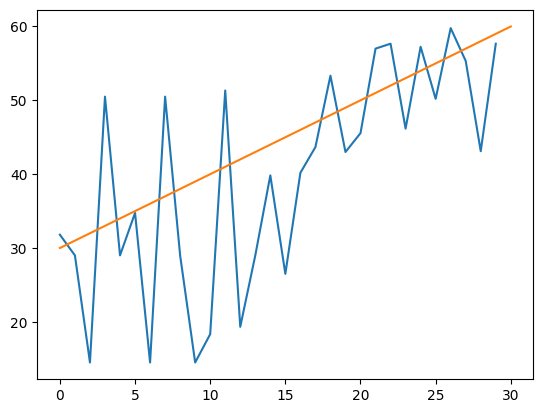

In [5]:
plt.plot(x)
plt.plot([i for i in range(30, 61)])

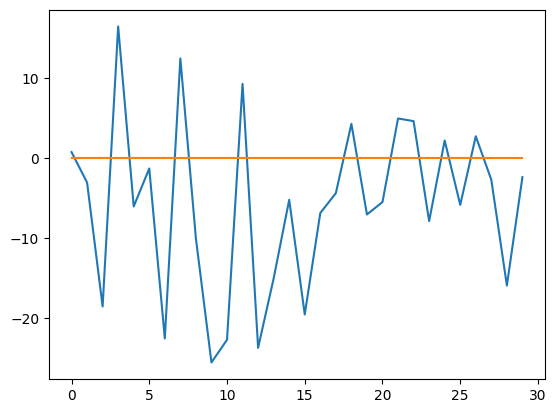

In [6]:
plt.plot(y)
plt.plot([0 for i in range(30)])